In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset with pandas
df = pd.read_csv('./data/Books_Data_Clean.csv')

In [3]:
# Display the first 5 rows of the dataset
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
# Describe the useful statistics of the dataset
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [5]:
# 
df = df[df["Publishing Year"] > 1800]

In [6]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          50
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [7]:
df.dropna(subset="Book Name", inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

index                  1029
Publishing Year         131
Book Name              1027
Author                  708
language_code             8
Author_Rating             4
Book_average_rating     133
Book_ratings_count     1023
genre                     4
gross sales             798
publisher revenue       587
sale price              145
sales rank              840
Publisher                 9
units sold              479
dtype: int64

Text(0.5, 1.0, 'Distribution of Publishing Year')

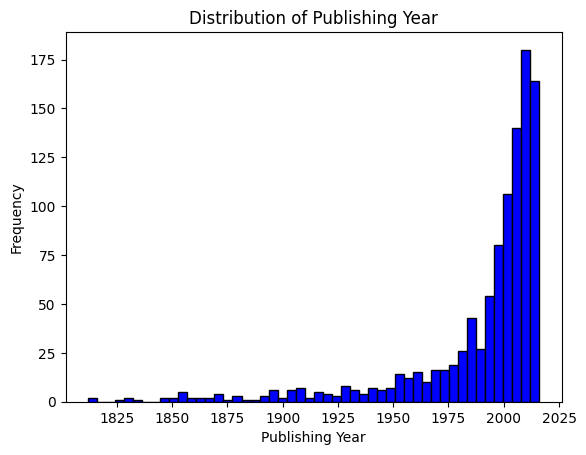

In [10]:
plt.hist(df["Publishing Year"], bins = 50, color = "blue", edgecolor = "black")
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")

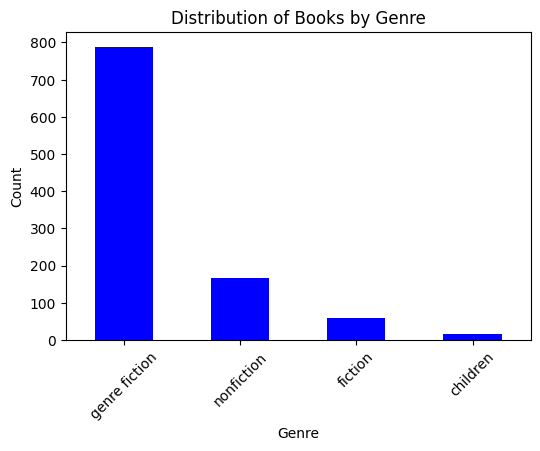

In [11]:
df["genre"].value_counts().plot(kind='bar', figsize=(6, 4), color='blue')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Books by Genre")
plt.xticks(rotation=45)
plt.show()

In [12]:
df.groupby("Author")["Book_average_rating"].mean().reset_index()

,Author,Book_average_rating
0,"A.A. Milne, Ernest H. Shepard",4.36
1,A.S.A. Harrison,3.30
2,Abbi Glines,4.21
3,Adam Johnson,4.06
4,"Adam Mansbach, Ricardo CortÃ©s",4.26
...,...,...
703,William Styron,4.18
704,"Yana Toboso, Tomo Kimura",4.37
705,Zadie Smith,3.75
706,"Ø£Ø­Ù„Ø§Ù… Ù…Ø³ØªØºØ§Ù†Ù…ÙŠ, Ahlam Mosteghanemi",3.72


In [13]:
df.groupby("Author")["Book_average_rating"].mean().reset_index().sort_values(by = "Book_average_rating", ascending=False)

,Author,Book_average_rating
74,Bill Watterson,4.650
75,"Bill Watterson, G.B. Trudeau",4.610
276,J.R.R. Tolkien,4.590
224,George R.R. Martin,4.560
600,Sarah J. Maas,4.526
...,...,...
50,Audrey Niffenegger,3.230
252,"Herman Koch, Sam Garrett",3.220
620,Stephen Crane,3.210
521,P.D. James,3.210


C:\Users\adity\AppData\Local\Temp\ipykernel_50384\828105642.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="genre", y="Book_average_rating", data=df, palette="Set3")


Text(0.5, 1.0, 'Boxplot of Book Average Rating by Genre')

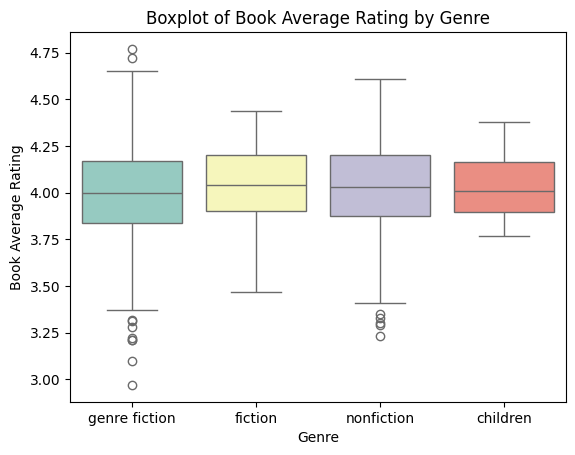

In [14]:
sns.boxplot(x="genre", y="Book_average_rating", data=df, palette="Set3")
plt.xlabel("Genre")
plt.ylabel("Book Average Rating")
plt.title("Boxplot of Book Average Rating by Genre")

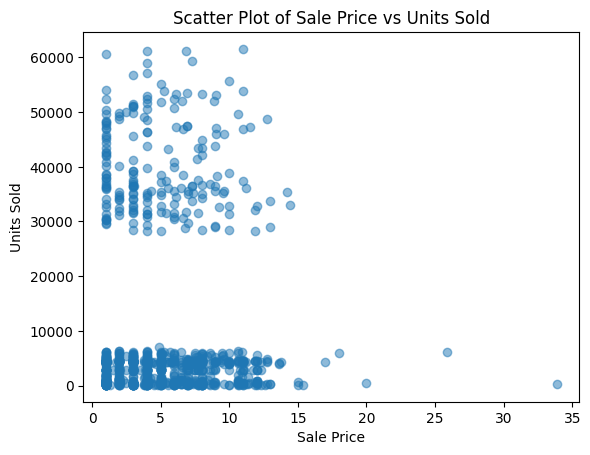

In [15]:
plt.scatter(df["sale price"], df["units sold"], alpha=0.5)
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Scatter Plot of Sale Price vs Units Sold")
plt.show()

In [16]:
language_counts = df["language_code"].value_counts()

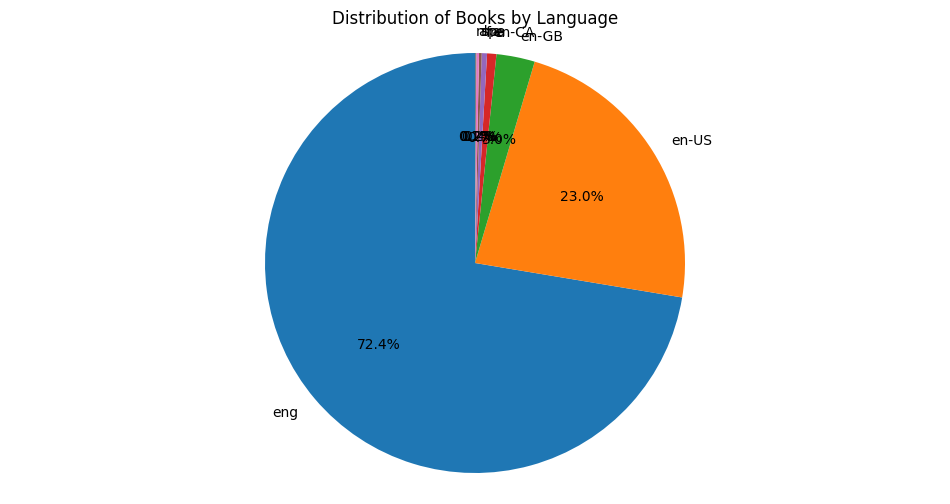

In [29]:
plt.figure(figsize=(12, 6))
plt.pie(df["language_code"].value_counts().head(10), labels=language_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Books by Language")
plt.show()

In [18]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

Publisher 
Penguin Group (USA) LLC                 200581.794
Random House LLC                        178797.222
Amazon Digital Services,  Inc.          143856.000
HarperCollins Publishers                125983.302
Hachette Book Group                     125146.842
Simon and Schuster Digital Sales Inc     46988.352
Macmillan                                32356.236
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [19]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False).head(1)

Author_Rating
Intermediate    101449.635762
Name: Book_ratings_count, dtype: float64

In [20]:
df.groupby("language_code").size().sort_values(ascending=False)

language_code
eng      710
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

In [21]:
df.groupby("Author_Rating")["Book_ratings_count"].max()

Author_Rating
Excellent       167848
Famous          206792
Intermediate    199872
Novice          155903
Name: Book_ratings_count, dtype: int64

<Axes: xlabel='Author_Rating'>

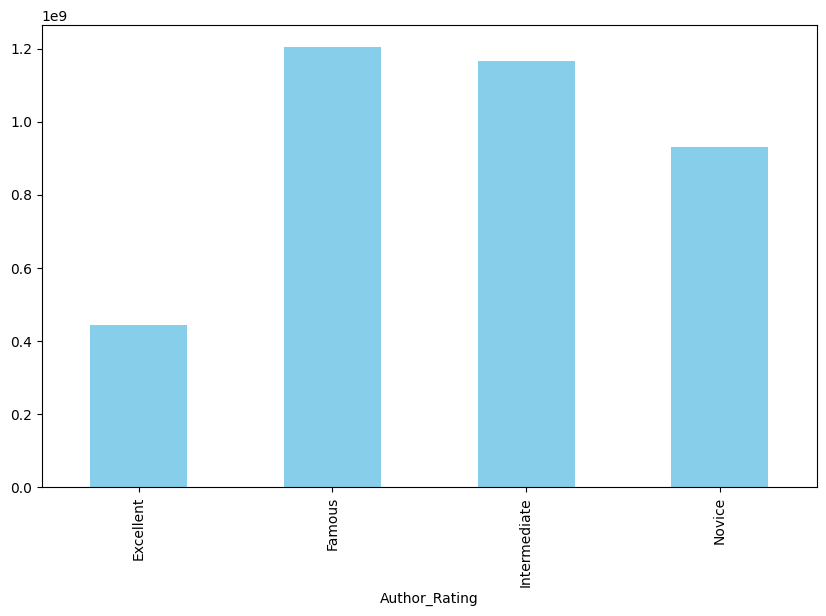

In [22]:
df.groupby("Author_Rating")["Book_ratings_count"].var().plot(kind='bar', figsize=(10, 6), color='skyblue')

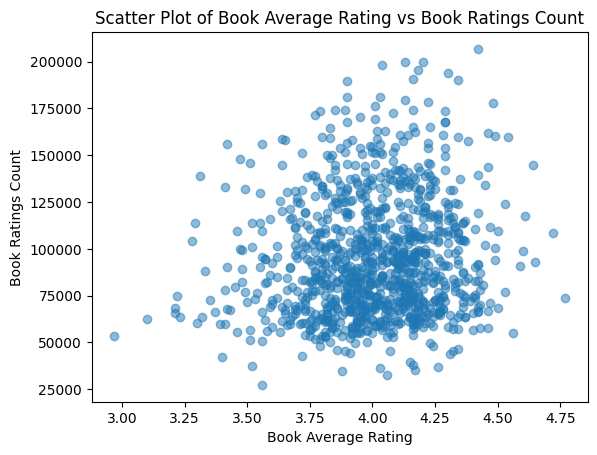

In [23]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"], alpha=0.5)
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.title("Scatter Plot of Book Average Rating vs Book Ratings Count")
plt.show()

In [24]:
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Harper Lee'),
  Text(1, 0, 'Stephen King'),
  Text(2, 0, 'David Sedaris'),
  Text(3, 0, 'Charlaine Harris'),
  Text(4, 0, 'Laini Taylor'),
  Text(5, 0, 'Unknown, Seamus Heaney'),
  Text(6, 0, 'Sarah Dessen'),
  Text(7, 0, 'Colleen Hoover'),
  Text(8, 0, 'C.S. Lewis'),
  Text(9, 0, 'Jeffrey Eugenides'),
  Text(10, 0, 'Charles Duhigg'),
  Text(11, 0, 'Michael Crichton'),
  Text(12, 0, 'John Berendt'),
  Text(13, 0, 'Frances Hodgson Burnett, Nancy Bond'),
  Text(14, 0, 'Nick Hornby'),
  Text(15, 0, 'Margery Williams Bianco, William   Nicholson'),
  Text(16, 0, 'Nicholas Sparks'),
  Text(17, 0, 'Victoria Aveyard'),
  Text(18, 0, 'John Grisham'),
  Text(19, 0, 'Charles Dickens, Jeremy Tambling')])

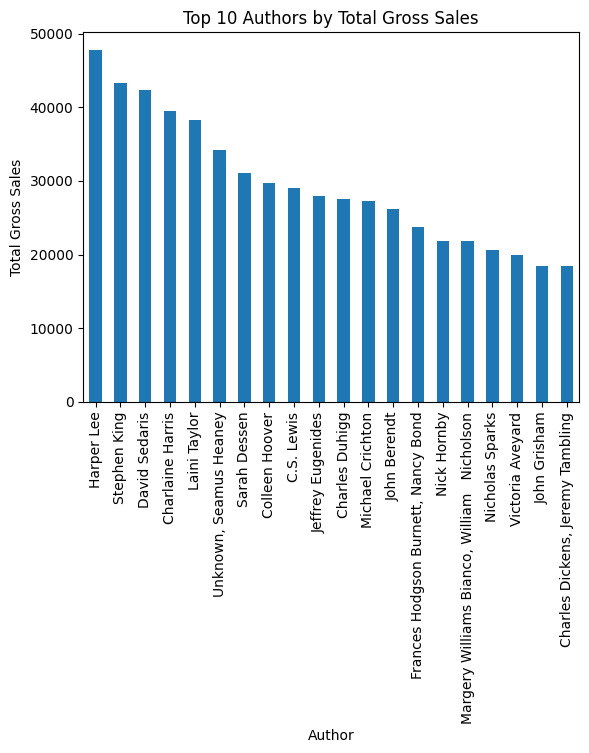

In [25]:
total_gross_sales_by_author.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Top 10 Authors by Total Gross Sales")
plt.xticks(rotation=90)

C:\Users\adity\AppData\Local\Temp\ipykernel_50384\2136613692.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Author_Rating", y="units sold", data=df, palette="Set1")


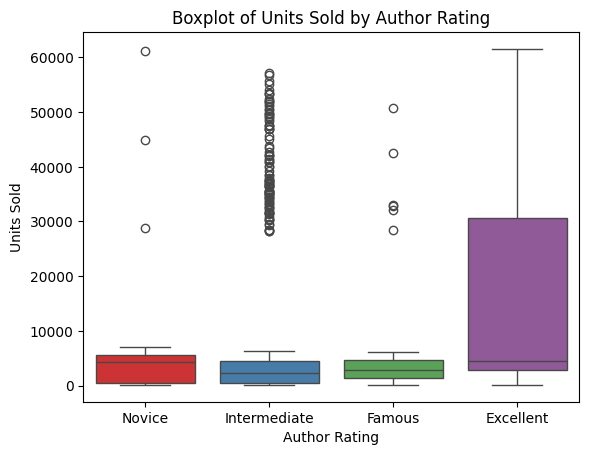

In [26]:
sns.boxplot(x="Author_Rating", y="units sold", data=df, palette="Set1")
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.title("Boxplot of Units Sold by Author Rating")
plt.show()

(array([1800., 1825., 1850., 1875., 1900., 1925., 1950., 1975., 2000.,
        2025., 2050.]),
 [Text(1800.0, 0, '1800'),
  Text(1825.0, 0, '1825'),
  Text(1850.0, 0, '1850'),
  Text(1875.0, 0, '1875'),
  Text(1900.0, 0, '1900'),
  Text(1925.0, 0, '1925'),
  Text(1950.0, 0, '1950'),
  Text(1975.0, 0, '1975'),
  Text(2000.0, 0, '2000'),
  Text(2025.0, 0, '2025'),
  Text(2050.0, 0, '2050')])

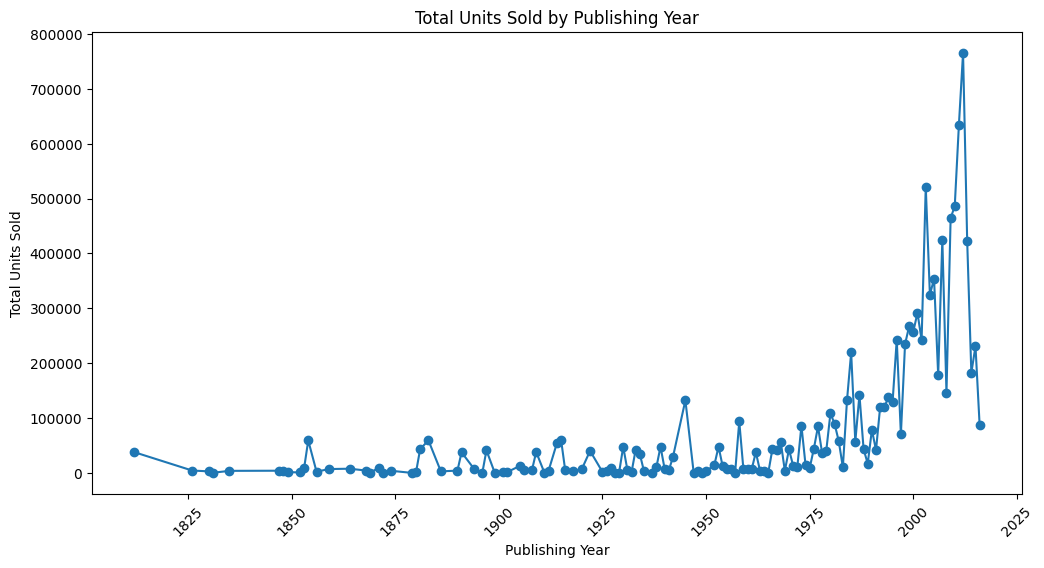

In [27]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind = 'line', figsize=(12, 6), marker='o')
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold by Publishing Year")
plt.xticks(rotation=45)